<a href="https://colab.research.google.com/github/iseequeue/pytorch/blob/main/01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading model",
                      6: "putting all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading model',
 6: 'putting all together'}

In [3]:
from torch import nn 
torch.__version__

'1.13.1+cu116'

## 1. Data (preparing and loading)

In [4]:
# create known parameters
weight = 0.7
bias = 0.3

#create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[10:]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [5]:
len(X), len(y)

(50, 50)

In [6]:
## Splitting data in train and test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train, 
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  '''
  Plots training data, test data and compares predictions
  '''
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
  #Plot test data in green
  plt.scatter(test_data, test_labels, c='green', s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='red', s=4, label="Predictions")
  plt.legend(prop={"size":14});



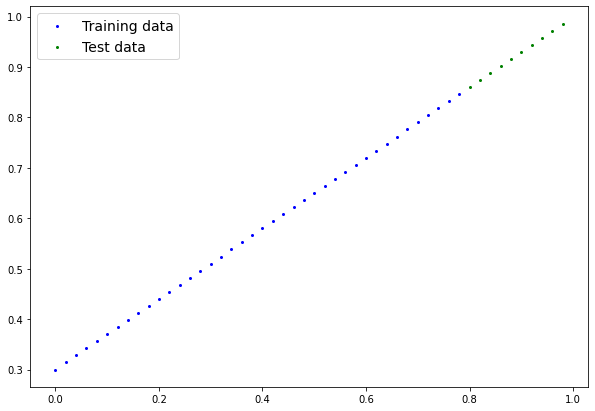

In [8]:
plot_predictions();

In [9]:
# 2. build pytorch model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
  #Forward is to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias
    


In [10]:
### checking contents
torch.manual_seed(42)

model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Make predictions with model

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
with torch.inference_mode(): #with torch.no_grad()
  y_preds = model0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

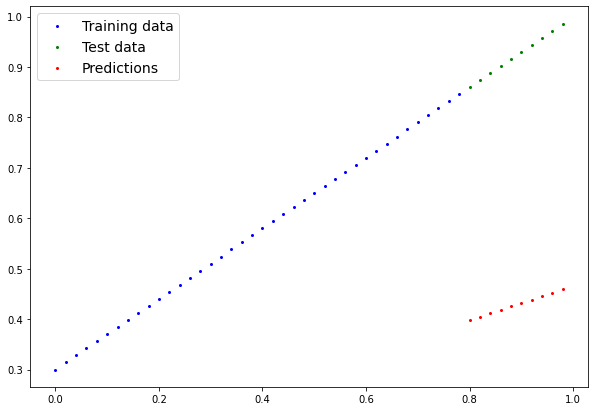

In [15]:
plot_predictions(predictions = y_preds)

## Train model

In [16]:
loss_fn = nn.L1Loss()

optimizer_fn = torch.optim.Adam(model0.parameters())



### Building a training loop

0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step

In [17]:
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
with torch.inference_mode():
  print(list(model0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [19]:
torch.manual_seed(42)

model0 = LinearRegressionModel()
loss_fn = nn.L1Loss()

optimizer_fn = torch.optim.Adam(model0.parameters())

epochs = 1000

epoch_count=[]
loss_values=[]
test_loss_values = []


### Training
#0. loop through the data
for epoch in range(epochs):
  model0.train()

  #1. forward
  y_pred = model0(X_train)
  #2. calc loss
  loss = loss_fn(y_pred, y_train)
  #3. optimizer zero grad
  optimizer_fn.zero_grad()
  #4. Backpropagation
  loss.backward()
  #5. Step optimizer
  optimizer_fn.step()
  #Testing
  model0.eval()
  #print(list(model0.parameters()))

  with torch.inference_mode():
    test_pred = model0(X_test)
    test_loss=loss_fn(test_pred, y_test)
  print(f"Epoch: {epoch :<3} | Loss: {loss:<25} | Test loss: {test_loss}")

  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)






Epoch: 0   | Loss: 0.31288138031959534       | Test loss: 0.49264615774154663
Epoch: 1   | Loss: 0.31149134039878845       | Test loss: 0.49075621366500854
Epoch: 2   | Loss: 0.31010133028030396       | Test loss: 0.4888661801815033
Epoch: 3   | Loss: 0.30871134996414185       | Test loss: 0.4869762361049652
Epoch: 4   | Loss: 0.30732136964797974       | Test loss: 0.48508620262145996
Epoch: 5   | Loss: 0.3059313893318176        | Test loss: 0.4831962585449219
Epoch: 6   | Loss: 0.30454137921333313       | Test loss: 0.4813062250614166
Epoch: 7   | Loss: 0.30315136909484863       | Test loss: 0.47941628098487854
Epoch: 8   | Loss: 0.30176135897636414       | Test loss: 0.4775262773036957
Epoch: 9   | Loss: 0.30037134885787964       | Test loss: 0.4756363034248352
Epoch: 10  | Loss: 0.29898136854171753       | Test loss: 0.47374624013900757
Epoch: 11  | Loss: 0.2975913882255554        | Test loss: 0.4718562960624695
Epoch: 12  | Loss: 0.29620134830474854       | Test loss: 0.46996623277

In [20]:
 print(list(model0.parameters()))   

[Parameter containing:
tensor([0.6998], requires_grad=True), Parameter containing:
tensor([0.2999], requires_grad=True)]


In [21]:
import numpy as np

In [22]:
epoch_count=torch.tensor(epoch_count).cpu().numpy()
loss_values=torch.tensor(loss_values).cpu().numpy()
test_loss_values=torch.tensor(test_loss_values).cpu().numpy()

Text(0.5, 1.0, 'loss')

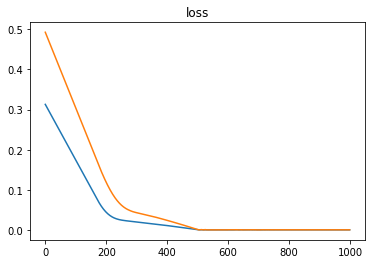

In [23]:
plt.plot(epoch_count, loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('loss')

In [24]:
with torch.inference_mode():
  y_pred_new = model0(X_test)
len(y_pred_new)

10

In [25]:
print(len(y))

50


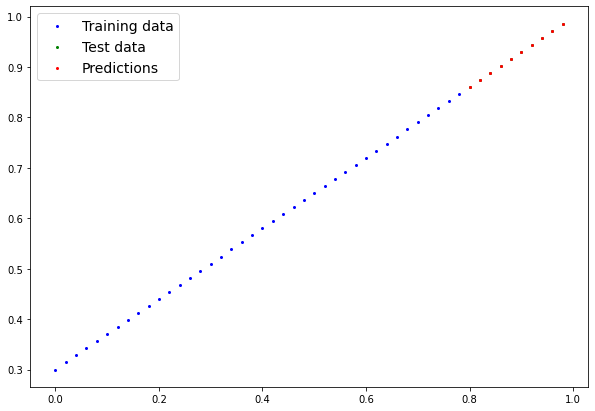

In [26]:
plot_predictions(predictions=y_pred_new)

## Saving a model in pytorch

In [27]:
params = [p.item() for p in list(model0.parameters())]
params # -> to text file

[0.699824333190918, 0.299852579832077]

In [28]:
from pathlib import Path

model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

model_name = "01_workflow.pth"
model_save_path = model_path / model_name

torch.save(obj=model0.state_dict(), f=model_save_path)

In [29]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1079 Mar  5 15:11 01_workflow.pth


In [30]:
loaded1 = torch.load('models/01_workflow.pth')

In [31]:
model1=LinearRegressionModel()
model1.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [32]:
model1(torch.tensor([0, 1, 2, 3, 4, 5, 0]))

tensor([0.2999, 0.9997, 1.6995, 2.3993, 3.0991, 3.7990, 0.2999],
       grad_fn=<AddBackward0>)

In [33]:
model0(torch.tensor([0, 1, 2, 3, 4, 5, 0]))

tensor([0.2999, 0.9997, 1.6995, 2.3993, 3.0991, 3.7990, 0.2999],
       grad_fn=<AddBackward0>)

## Excercises

In [34]:
weights = torch.tensor([2.3, 1.9])

#create data
start = 0
end = 4
step = 0.02
args = torch.arange(start, end, step)
x0 = torch.ones(len(args))
x1 = args
x2 = args**2
X = torch.stack([x1, x2], dim=1)
y=X @ weights.T + 0.4
X


<ipython-input-34-4d49156c4e7c>:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  y=X @ weights.T + 0.4


tensor([[0.0000e+00, 0.0000e+00],
        [2.0000e-02, 4.0000e-04],
        [4.0000e-02, 1.6000e-03],
        [6.0000e-02, 3.6000e-03],
        [8.0000e-02, 6.4000e-03],
        [1.0000e-01, 1.0000e-02],
        [1.2000e-01, 1.4400e-02],
        [1.4000e-01, 1.9600e-02],
        [1.6000e-01, 2.5600e-02],
        [1.8000e-01, 3.2400e-02],
        [2.0000e-01, 4.0000e-02],
        [2.2000e-01, 4.8400e-02],
        [2.4000e-01, 5.7600e-02],
        [2.6000e-01, 6.7600e-02],
        [2.8000e-01, 7.8400e-02],
        [3.0000e-01, 9.0000e-02],
        [3.2000e-01, 1.0240e-01],
        [3.4000e-01, 1.1560e-01],
        [3.6000e-01, 1.2960e-01],
        [3.8000e-01, 1.4440e-01],
        [4.0000e-01, 1.6000e-01],
        [4.2000e-01, 1.7640e-01],
        [4.4000e-01, 1.9360e-01],
        [4.6000e-01, 2.1160e-01],
        [4.8000e-01, 2.3040e-01],
        [5.0000e-01, 2.5000e-01],
        [5.2000e-01, 2.7040e-01],
        [5.4000e-01, 2.9160e-01],
        [5.6000e-01, 3.1360e-01],
        [5.800

In [35]:
## Splitting data in train and test
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

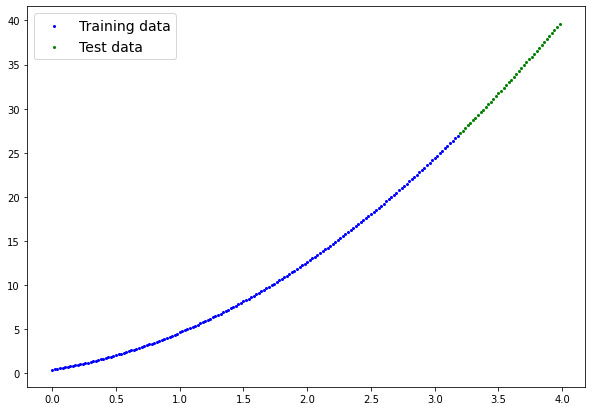

In [36]:
plot_predictions(train_data = X_train[:, 0],
                     train_labels=y_train, 
                     test_data=X_test[:, 0],
                     test_labels=y_test, predictions=None);

In [37]:
class LinearRegessionModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=2, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [38]:
torch.manual_seed(42)
model_1 = LinearRegessionModel1()
model_1, model_1.state_dict()

(LinearRegessionModel1(
   (linear_layer): Linear(in_features=2, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.5406, 0.5869]])),
              ('linear_layer.bias', tensor([-0.1657]))]))

In [39]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [40]:
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [41]:
loss_fn = nn.L1Loss()
optimizer_fn = torch.optim.Adam(params=model_1.parameters())

In [43]:
model_1(X_test).squeeze()

RuntimeError: ignored

In [47]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epoch_count=[]
loss_values=[]
test_loss_values = []


### Training
#0. loop through the data
for epoch in range(epochs):
  model_1.train()

  #1. forward
  y_pred = model_1(X_train).squeeze()
  #2. calc loss
  
  loss = loss_fn(y_pred, y_train)
  #3. optimizer zero grad
  optimizer_fn.zero_grad()
  #4. Backpropagation
  loss.backward()
  #5. Step optimizer
  optimizer_fn.step()
  #Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test).squeeze()
    test_loss=loss_fn(test_pred, y_test)
  print(f"Epoch: {epoch :<3} | Loss: {loss:<25} | Test loss: {test_loss}")

  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

Epoch: 0   | Loss: 0.049928080290555954      | Test loss: 0.1875036209821701
Epoch: 1   | Loss: 0.049886785447597504      | Test loss: 0.18731307983398438
Epoch: 2   | Loss: 0.04984532296657562       | Test loss: 0.18709497153759003
Epoch: 3   | Loss: 0.049803927540779114      | Test loss: 0.18695631623268127
Epoch: 4   | Loss: 0.049762383103370667      | Test loss: 0.1867837905883789
Epoch: 5   | Loss: 0.049721017479896545      | Test loss: 0.18671122193336487
Epoch: 6   | Loss: 0.04967993125319481       | Test loss: 0.18659888207912445
Epoch: 7   | Loss: 0.04963841661810875       | Test loss: 0.18645010888576508
Epoch: 8   | Loss: 0.04959680512547493       | Test loss: 0.18626832962036133
Epoch: 9   | Loss: 0.04955531284213066       | Test loss: 0.18608208000659943
Epoch: 10  | Loss: 0.04951367899775505       | Test loss: 0.18589544296264648
Epoch: 11  | Loss: 0.049472302198410034      | Test loss: 0.18570351600646973
Epoch: 12  | Loss: 0.049430880695581436      | Test loss: 0.185614

In [48]:
epoch_count=torch.tensor(epoch_count).cpu().numpy()
loss_values=torch.tensor(loss_values).cpu().numpy()
test_loss_values=torch.tensor(test_loss_values).cpu().numpy()

Text(0.5, 1.0, 'loss')

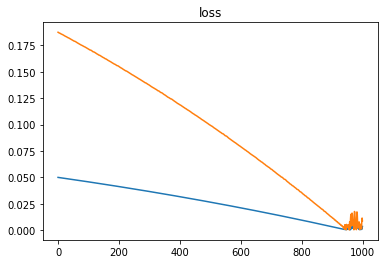

In [49]:
plt.plot(epoch_count, loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('loss')

In [50]:
list(model_1.parameters())

[Parameter containing:
 tensor([[2.3004, 1.8992]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.3994], device='cuda:0', requires_grad=True)]

<ipython-input-51-f56e9e2d3655>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  preds = torch.tensor(preds).cpu().numpy()
<ipython-input-51-f56e9e2d3655>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train=torch.tensor(X_train).cpu().numpy()
<ipython-input-51-f56e9e2d3655>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test=torch.tensor(X_test).cpu().numpy()
<ipython-input-51-f56e9e2d3655>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requ

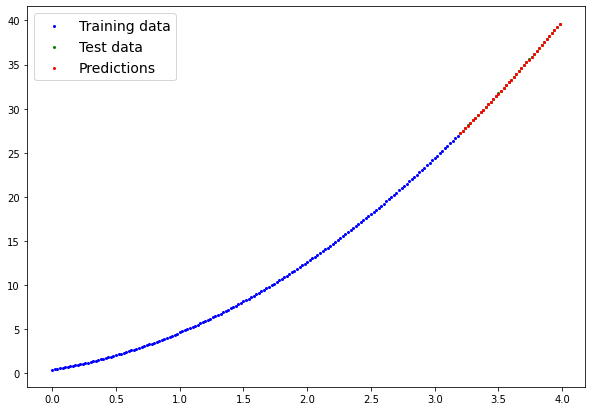

In [51]:
with torch.inference_mode():
  preds = model_1(X_test)
preds = torch.tensor(preds).cpu().numpy()
X_train=torch.tensor(X_train).cpu().numpy()
X_test=torch.tensor(X_test).cpu().numpy()
y_test=torch.tensor(y_test).cpu().numpy()
y_train=torch.tensor(y_train).cpu().numpy()
model_1.to("cpu")


plot_predictions(train_data = X_train[:, 0],
                     train_labels=y_train, 
                     test_data=X_test[:, 0],
                     test_labels=y_test, predictions=preds)

In [52]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/model_1.pth


In [54]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegessionModel1()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegessionModel1(
  (linear_layer): Linear(in_features=2, out_features=1, bias=True)
)
Model on device:
cuda:0
